<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [80]:
%matplotlib inline
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [81]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [82]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [83]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris=pd.read_csv(url,names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"])

In [84]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Task 3: Visualize the Data
---

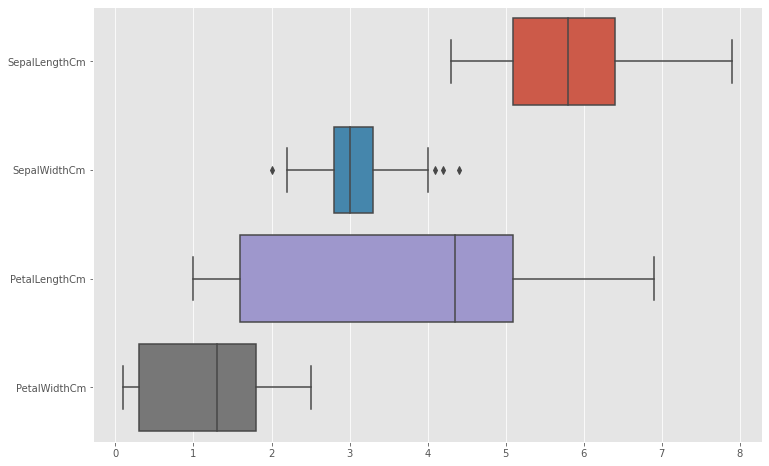

In [85]:
# show outliers
sns.boxplot(data=iris, orient="horizontal")
plt.show()

In [103]:
iris.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


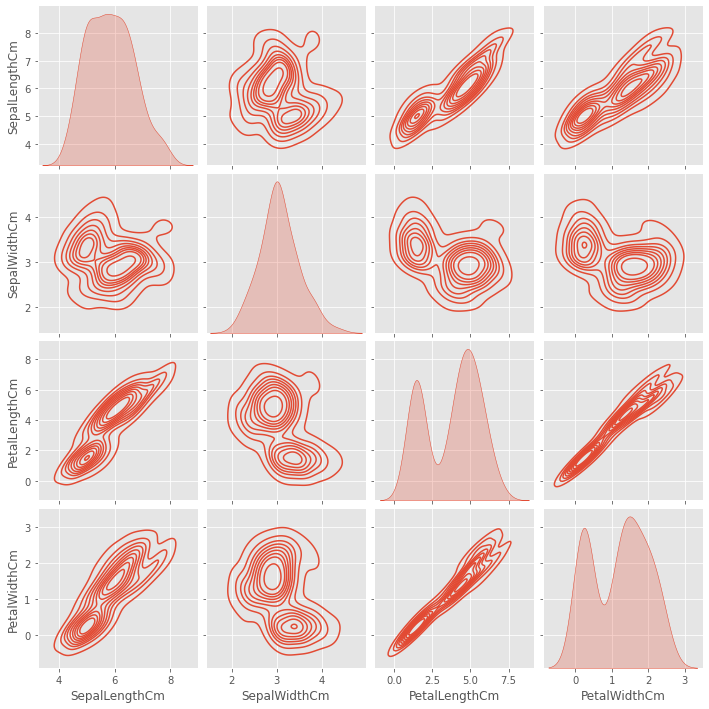

In [106]:
sns.pairplot(iris, kind="kde")
plt.show()

In [110]:
iris.loc[iris["Species"] == "Iris-setosa", :].cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.124249,0.100298,0.016139,0.010547
SepalWidthCm,0.100298,0.145180,0.011682,0.011437
PetalLengthCm,0.016139,0.011682,0.030106,0.005698
PetalWidthCm,0.010547,0.011437,0.005698,0.011494


In [112]:
iris.loc[iris["Species"] == "Iris-setosa", :].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.746780,0.263874,0.279092
SepalWidthCm,0.746780,1.000000,0.176695,0.279973
PetalLengthCm,0.263874,0.176695,1.000000,0.306308
PetalWidthCm,0.279092,0.279973,0.306308,1.000000


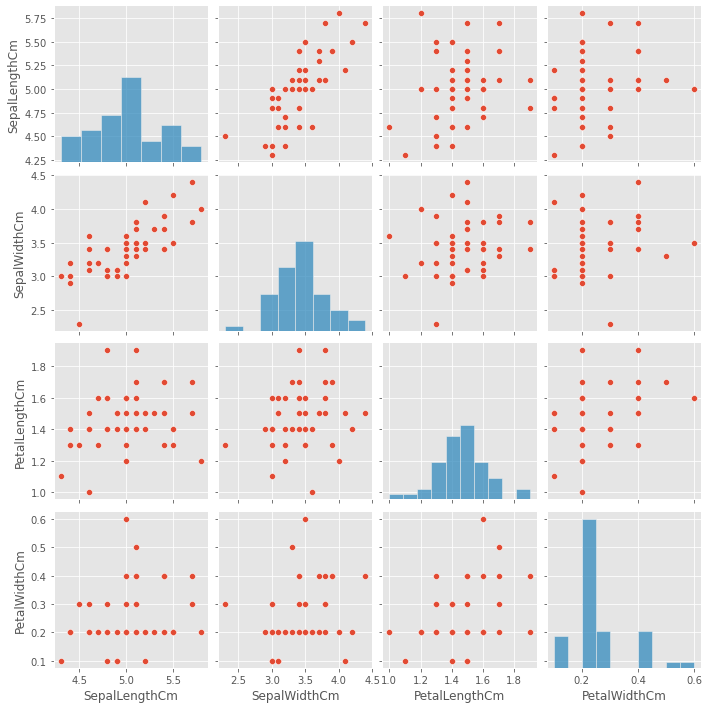

In [111]:
sns.pairplot(iris.loc[iris["Species"] == "Iris-setosa", :])
plt.show()

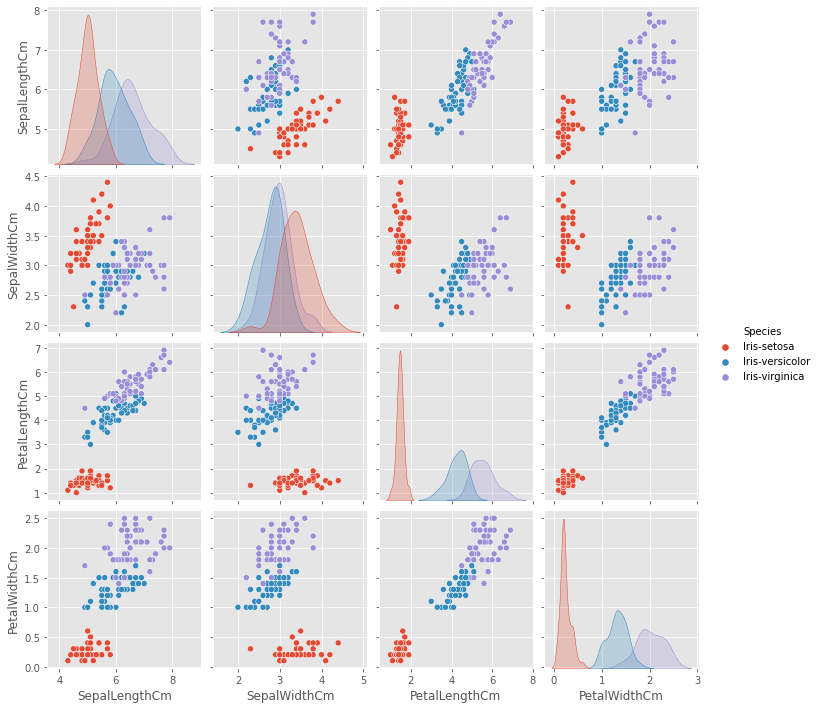

In [86]:
sns.pairplot(iris, hue="Species")
plt.show()

### Task 4: Standardize the Data
---

In [87]:
sp.stats.zscore( iris.loc[:, iris.columns != "Species"] )

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [88]:
iris_std = iris.loc[:, iris.columns != "Species"].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
iris_std

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593
...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121
146,0.551486,-1.277692,0.703536,0.918985
147,0.793012,-0.124540,0.816888,1.050019
148,0.430722,0.797981,0.930239,1.443121


### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [102]:
iris.SepalLengthCm.var()

0.6856935123042505

In [100]:
iris.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


In [101]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [89]:
iris_cov = iris_std.cov()
iris_cov

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [99]:
iris_std.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [90]:
eig_values, eig_vectors = np.linalg.eig(iris_cov)
print("Eigen Values:", eig_values, sep="\n", end="\n\n")
print("Eigen Vectors:", eig_vectors, sep="\n")
[element/eig_values.sum() for element in eig_values]

Eigen Values:
[2.91081808 0.92122093 0.14735328 0.02060771]

Eigen Vectors:
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


[0.7277045209380135,
 0.230305232676806,
 0.03683831957627393,
 0.005151926808906587]

We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [91]:
eig_vectors.dot(np.diag(eig_values).dot(np.linalg.inv(eig_vectors)))

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

### Task 6: Singular Value Decomposition (SVD)
---

In [92]:
u, s, v = np.linalg.svd(iris_std)
print("u:",  u, u.shape, sep="\n", end="\n\n")
print("s:",  s, s.shape, sep="\n", end="\n\n")
print("vh:", vh, vh.shape, sep="\n", end="\n\n")

u:
[[-1.08374515e-01 -4.30198387e-02  2.59377669e-02 ...  5.42576376e-02
   1.60581494e-03  2.27770498e-03]
 [-9.98503796e-02  5.57547718e-02  4.83370288e-02 ...  5.32189412e-03
   8.56651825e-02  6.44405862e-03]
 [-1.13323362e-01  2.70926177e-02 -1.09498919e-02 ...  2.76010922e-02
   1.78415121e-01  1.49430370e-01]
 ...
 [ 7.27833114e-02 -2.26960075e-02 -3.81328738e-02 ...  9.89545817e-01
  -1.24233079e-02 -6.58105858e-04]
 [ 6.58701606e-02 -8.64611208e-02 -1.98113038e-01 ... -1.40226565e-02
   9.52228601e-01 -2.32385318e-02]
 [ 4.59092965e-02  1.89567788e-03 -1.12476331e-01 ... -7.86338250e-04
  -2.19591161e-02  9.77215825e-01]]
(150, 150)

s:
[20.82575075 11.71588318  4.68568442  1.75229803]
(4,)

vh:
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]
(4, 4)



### Task 7: Picking Principal Components Using the Explained Variance
---

In [93]:
# explained_variance_ratio_
exp_vars = [element/eig_values.sum() for element in eig_values]
pca_dict = {eig_value: exp_var for eig_value, exp_var in zip(eig_values, exp_vars)}
pca_dict

{2.9108180837520554: 0.7277045209380135,
 0.9212209307072244: 0.230305232676806,
 0.1473532783050958: 0.03683831957627393,
 0.020607707235626358: 0.005151926808906587}

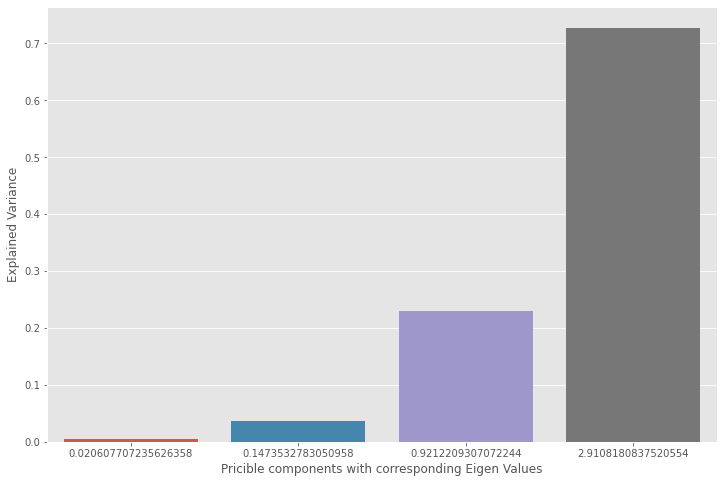

In [94]:
sns.barplot(x=list(pca_dict.keys()), y=list(pca_dict.values()))
plt.xlabel("Pricible components with corresponding Eigen Values")
plt.ylabel("Explained Variance")
plt.show()

In [95]:
pca_2_basis = eig_vectors[:, :2]
pca_2_basis

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [96]:
iris_pca = iris_std.dot(pca_2_basis)
iris_pca.columns = ['PCA1', 'PCA2']
iris_pca["target"] = iris.iloc[:, -1]
iris_pca

,PCA1,PCA2,target
0,-2.256981,-0.504015,Iris-setosa
1,-2.079459,0.653216,Iris-setosa
2,-2.360044,0.317414,Iris-setosa
3,-2.296504,0.573447,Iris-setosa
4,-2.380802,-0.672514,Iris-setosa
...,...,...,...
145,1.864277,-0.381544,Iris-virginica
146,1.553288,0.902291,Iris-virginica
147,1.515767,-0.265904,Iris-virginica
148,1.371796,-1.012968,Iris-virginica


### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

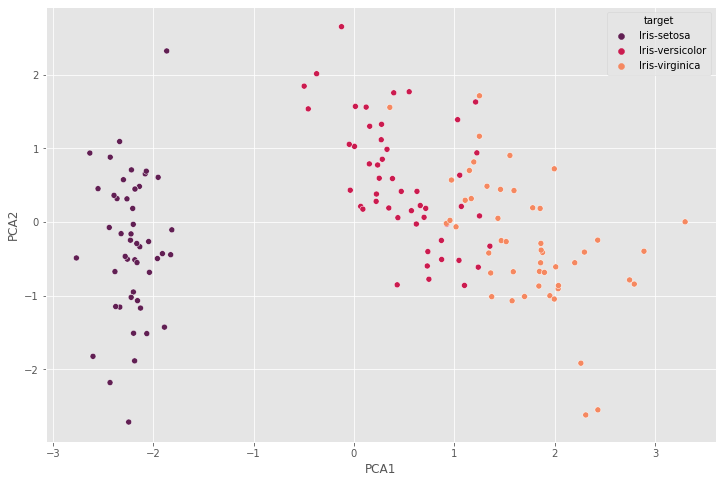

In [97]:
sns.scatterplot(data=iris_pca, x="PCA1", y="PCA2", hue="target", palette="rocket")
plt.show()